<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230224.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta
import os 
import re
from functools import reduce
from collections import defaultdict
from scipy import stats
from scipy.stats import norm


# Customer Analysis

In [2]:
os.listdir()

['.config',
 'sample-sales-data.csv',
 '1_customers_dataset.csv',
 'online_retail_II.xlsx',
 'cookie_cats.csv',
 'lead_conversion.csv',
 'scanner_data.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 '1_orders_dataset.csv',
 'test.csv',
 'sales_vs_discount.csv',
 'sales_data_with_stores.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'ecommerce-data.csv',
 'groceries.csv',
 '1_order_payments_dataset.csv',
 'sales.csv',
 'online_retail.xlsx',
 'mall_customers.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'mock_sales_data.csv',
 'bz_data_analyis.csv',
 'app_wau.csv',
 'ab_experiment.csv',
 'match_result_test.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sample_data']

In [3]:
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [5]:
cnt = pd.melt(df, id_vars = ['userid', 'version','sum_gamerounds'], var_name ='retention', value_name = 'result')
cnt = cnt.groupby(['version','retention','result'])['userid'].count().reset_index(name = 'cnt')
cnt = cnt[cnt['result'] == True]
cnt

,version,retention,result,cnt
1,gate_30,retention_1,True,20034
3,gate_30,retention_7,True,8502
5,gate_40,retention_1,True,20119
7,gate_40,retention_7,True,8279


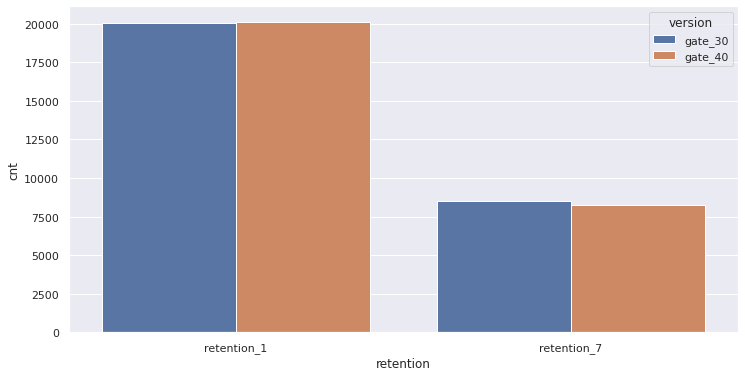

In [6]:
sns.set(rc = {'figure.figsize':[12,6]})
sns.barplot(data = cnt, x = 'retention', y = 'cnt', hue = 'version')
plt.show()

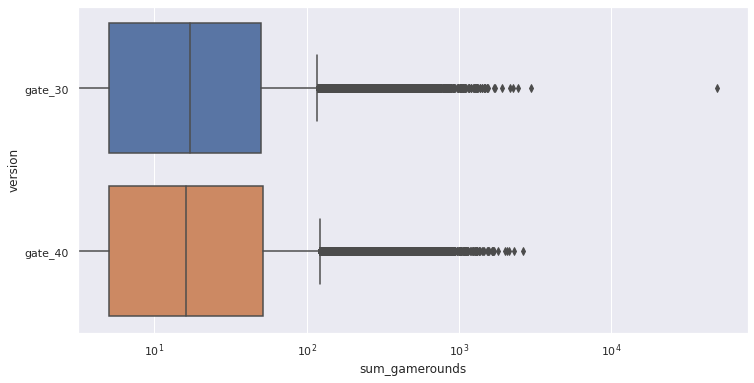

In [8]:
sns.set(rc = {'figure.figsize':[12,6]})
ax = sns.boxplot(data = df, x = 'sum_gamerounds', y = 'version')
ax.set_xscale('log')
plt.show()

In [9]:
df = df[df['sum_gamerounds'] <= 10000]

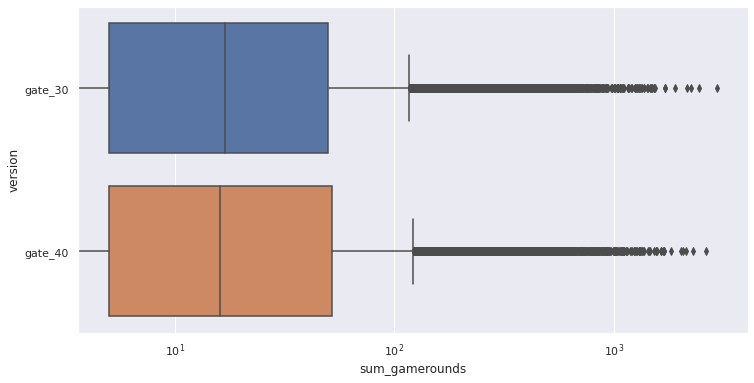

In [10]:
sns.set(rc = {'figure.figsize':[12,6]})
ax = sns.boxplot(data = df, x = 'sum_gamerounds', y = 'version')
ax.set_xscale('log')
plt.show()

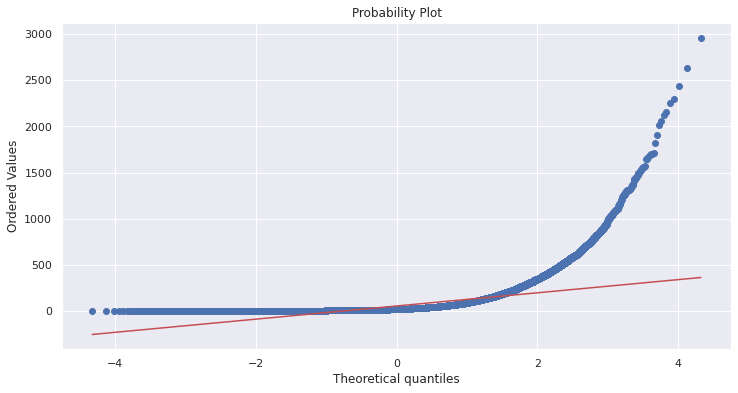

In [11]:
stats.probplot(df['sum_gamerounds'], dist = 'norm', plot = plt)
plt.show()

In [13]:
stat, p = stats.chisquare(df['sum_gamerounds'])
print(str(stat),'\t',str(p))

18528909.99029161 	 0.0


In [14]:
res = stats.anderson(df['sum_gamerounds'])
res

AndersonResult(statistic=13369.548966017013, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [15]:
res2 = zip(res.critical_values, res.significance_level)

In [16]:
[f'probably Gaussian : critical value is {crit}, significance level is {sig}'
 if crit > sig
 else f'probably not Gaussian : critical value is {crit}, significance level is {sig}'
 for crit, sig in res2
]

['probably not Gaussian : critical value is 0.576, significance level is 15.0',
 'probably not Gaussian : critical value is 0.656, significance level is 10.0',
 'probably not Gaussian : critical value is 0.787, significance level is 5.0',
 'probably not Gaussian : critical value is 0.918, significance level is 2.5',
 'probably Gaussian : critical value is 1.092, significance level is 1.0']

In [17]:
n = 1000
boots = pd.DataFrame(
    [df.sample(frac = .1, replace = True).groupby(['version'])['sum_gamerounds'].mean() for i in range(n)]
)
boots.head()

version,gate_30,gate_40
sum_gamerounds,48.495219,50.083591
sum_gamerounds,52.053739,48.684384
sum_gamerounds,50.467006,51.076616
sum_gamerounds,52.249831,51.106611
sum_gamerounds,50.929785,53.730152


<AxesSubplot:ylabel='Density'>

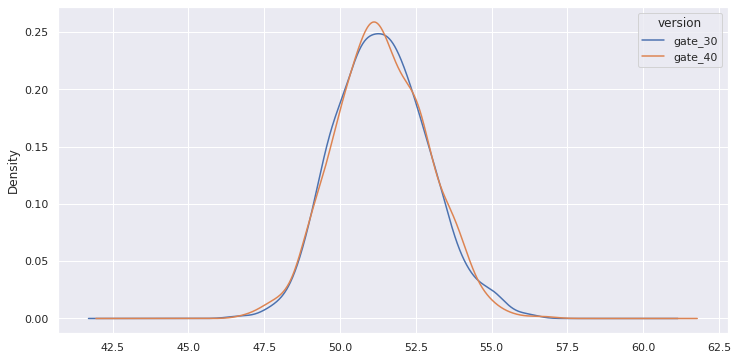

In [18]:
boots.plot.kde()

In [19]:
diff = boots['gate_30'] - boots['gate_40']
len(diff[diff > 0])/n

0.486

In [20]:
z_mean = np.mean(boots['gate_30']) - np.mean(boots['gate_40'])
z_sigma = np.sqrt(
    np.var(boots['gate_30'])/n + np.var(boots['gate_40'])/n
)
alpha = .05
ci_diff = [z_mean - norm.ppf(1 - alpha/2 ) * z_sigma, z_mean + norm.ppf(1 - alpha/2 ) * z_sigma]

In [22]:
print(f'Z Mean : {z_mean}')
print(f'Z Sigma : {z_sigma}')
print(f'CI DIff : {ci_diff[0]} {ci_diff[1]}')

Z Mean : 0.009619506270233558
Z Sigma : 0.06786730029210981
CI DIff : -0.12339795803026637 0.1426369705707335


Text(0.5, 0, 'difference of bootstrapped gamerounds')

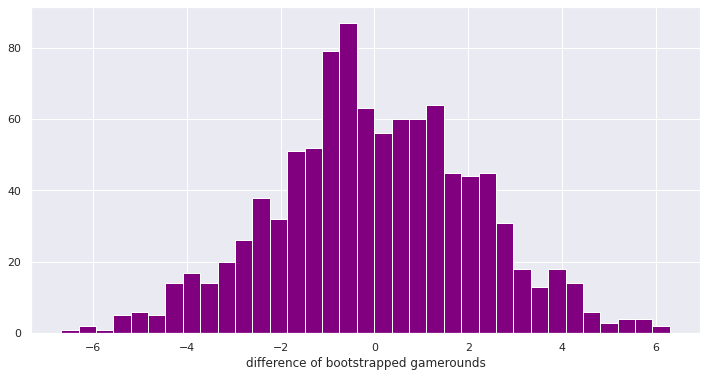

In [23]:
plt.hist(diff, bins = 35, color = 'purple')
plt.xlabel('difference of bootstrapped gamerounds')

# Iterators

In [24]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [25]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}